# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os #for interacting with os
import glob
from google.colab import drive
import zipfile
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Gathering Data

In [2]:
import zipfile

with zipfile.ZipFile('/content/gdrive/MyDrive/Capstone/datasetmakanan.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [3]:
!unzip gdrive/My\ Drive/Capstone/datasetmakanan.zip

Archive:  gdrive/My Drive/Capstone/datasetmakanan.zip
replace nutrition.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: nutrition.csv           


In [4]:
df = pd.read_csv('nutrition.csv')

In [5]:
df

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
...,...,...,...,...,...,...,...
1345,1346,52.0,3.3,2.5,4.0,Yoghurt,https://d1vbn70lmn1nqe.cloudfront.net/prod/wp-...
1346,1347,225.0,19.5,14.8,4.8,Sate Ayam,https://asset.kompas.com/crops/QgfVXuMhL5tHLqn...
1347,1348,202.0,10.2,16.4,3.5,Telur Balado,https://asset.kompas.com/crops/ZAz3wC7IIS7ATFM...
1348,1349,410.0,28.0,25.0,17.0,Caesar Salad,https://natashaskitchen.com/wp-content/uploads...


# Assessing Data

In [6]:
df.shape

(1350, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1350 non-null   object 
 1   calories      1253 non-null   float64
 2   proteins      1253 non-null   float64
 3   fat           1253 non-null   float64
 4   carbohydrate  1253 non-null   float64
 5   name          1253 non-null   object 
 6   image         1253 non-null   object 
dtypes: float64(4), object(3)
memory usage: 74.0+ KB


In [8]:
checknull = df.isna().sum()
print(checknull)

id               0
calories        97
proteins        97
fat             97
carbohydrate    97
name            97
image           97
dtype: int64


# Cleaning Data

In [9]:
df = df.dropna()
df

,id,calories,proteins,fat,carbohydrate,name,image
0,1,280.0,9.2,28.4,0.0,Abon,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,513.0,23.7,37.0,21.3,Abon haruwan,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,0.0,0.0,0.2,0.0,Agar-agar,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,45.0,1.1,0.4,10.8,Akar tonjong segar,https://images.tokopedia.net/img/cache/200-squ...
4,5,37.0,4.4,0.5,3.8,Aletoge segar,https://nilaigizi.com/assets/images/produk/pro...
...,...,...,...,...,...,...,...
1345,1346,52.0,3.3,2.5,4.0,Yoghurt,https://d1vbn70lmn1nqe.cloudfront.net/prod/wp-...
1346,1347,225.0,19.5,14.8,4.8,Sate Ayam,https://asset.kompas.com/crops/QgfVXuMhL5tHLqn...
1347,1348,202.0,10.2,16.4,3.5,Telur Balado,https://asset.kompas.com/crops/ZAz3wC7IIS7ATFM...
1348,1349,410.0,28.0,25.0,17.0,Caesar Salad,https://natashaskitchen.com/wp-content/uploads...


In [10]:
checknull = df.isna().sum()
print(checknull)

id              0
calories        0
proteins        0
fat             0
carbohydrate    0
name            0
image           0
dtype: int64


In [11]:
df.describe()

,calories,proteins,fat,carbohydrate
count,1253.000000,1253.000000,1253.000000,1253.000000
mean,201.189705,10.258819,7.520670,24.086672
std,162.880114,12.067529,13.880571,27.185610
min,0.000000,0.000000,0.000000,0.000000
25%,73.000000,1.900000,0.500000,4.200000
50%,143.000000,5.200000,1.900000,12.600000
75%,332.000000,15.600000,8.000000,35.500000
max,902.000000,83.000000,100.000000,332.000000


In [12]:
name_column = df.pop('name')
df.insert(1, 'name', name_column)

In [13]:
df

,id,name,calories,proteins,fat,carbohydrate,image
0,1,Abon,280.0,9.2,28.4,0.0,https://img-cdn.medkomtek.com/PbrY9X3ignQ8sVuj...
1,2,Abon haruwan,513.0,23.7,37.0,21.3,https://img-global.cpcdn.com/recipes/cbf330fbd...
2,3,Agar-agar,0.0,0.0,0.2,0.0,https://res.cloudinary.com/dk0z4ums3/image/upl...
3,4,Akar tonjong segar,45.0,1.1,0.4,10.8,https://images.tokopedia.net/img/cache/200-squ...
4,5,Aletoge segar,37.0,4.4,0.5,3.8,https://nilaigizi.com/assets/images/produk/pro...
...,...,...,...,...,...,...,...
1345,1346,Yoghurt,52.0,3.3,2.5,4.0,https://d1vbn70lmn1nqe.cloudfront.net/prod/wp-...
1346,1347,Sate Ayam,225.0,19.5,14.8,4.8,https://asset.kompas.com/crops/QgfVXuMhL5tHLqn...
1347,1348,Telur Balado,202.0,10.2,16.4,3.5,https://asset.kompas.com/crops/ZAz3wC7IIS7ATFM...
1348,1349,Caesar Salad,410.0,28.0,25.0,17.0,https://natashaskitchen.com/wp-content/uploads...


# Data Visualization

<ipython-input-14-a467f9623f0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y=df.sort_values(by='calories', ascending=False).head(10).name,


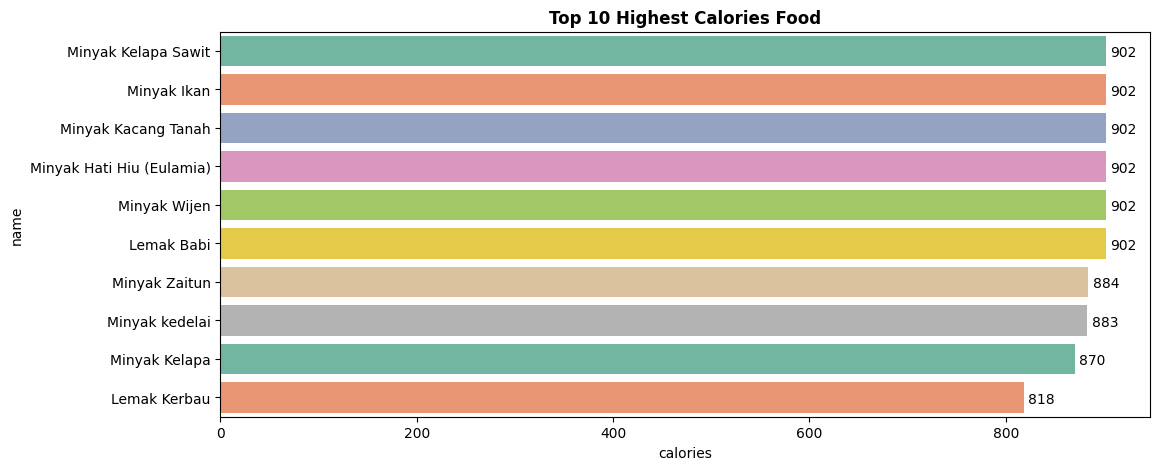

In [14]:
plt.figure(figsize=(12,5))

ax=sns.barplot(y=df.sort_values(by='calories', ascending=False).head(10).name,
            x=df.sort_values(by='calories', ascending=False).head(10).calories,
           palette='Set2')

for p in ax.patches:
    width = p.get_width()
    plt.text(18+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

sns.set(style='darkgrid')

plt.xticks()

plt.xlabel('calories')
plt.ylabel('name')
plt.title('Top 10 Highest Calories Food', fontweight="bold")
plt.show()

In [15]:
from google.colab import files

cleaned_file_path = 'nutritioncleaned.csv'
df.to_csv(cleaned_file_path, index=False)

files.download(cleaned_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>